   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


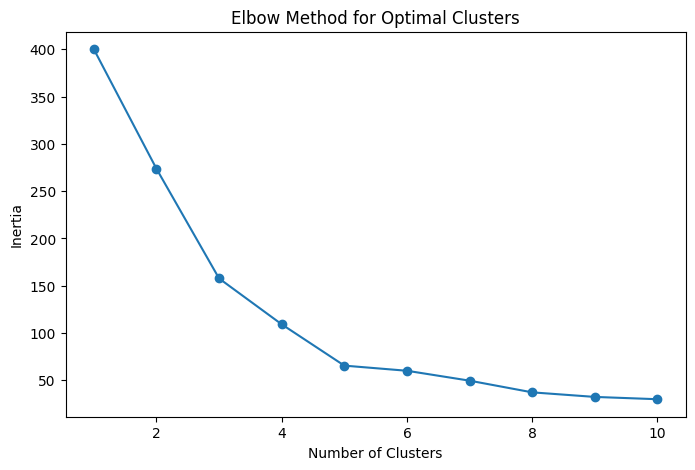

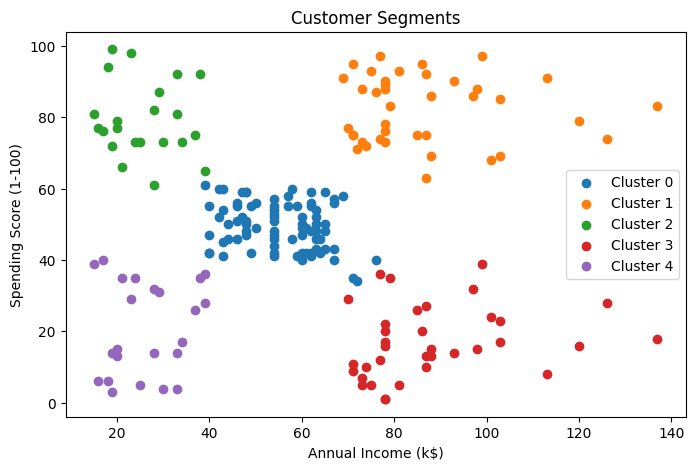

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset

data = pd.read_csv("Mall_Customers.csv")

# Display dataset summary
print(data.head())

# Select relevant features for clustering
# 'Annual Income (k$)' and 'Spending Score (1-100)'
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
optimal_clusters = 5  # Assume 5 for this example
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Add cluster labels to the original dataset
data['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_clusters):
    plt.scatter(
        data[data['Cluster'] == cluster]['Annual Income (k$)'],
        data[data['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f"Cluster {cluster}"
    )

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
